In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Pruebas de hipótesis para diferencias

Las pruebas de hipótesis para diferencias son procedimientos estadísticos que nos permiten determinar, a partir de datos muestrales, si existe evidencia suficiente para afirmar que dos poblaciones son diferentes en cuanto a su media o a su varianza

Estas pruebas se aplican cuando se quiere comparar dos grupos o condiciones distintas, por ejemplo:

- Eficacia de dos medicamentos

- Rendimiento de estudiantes con métodos distintos de enseñanza

- Producción de máquinas distintas

Por ejemplo, intentaremos comparar las alturas medias de dos poblaciones distintas (en este caso, consideraremos las alturas de los hombres y las mujeres).

**Muestra 1: Diferentes alturas correspondientes al grupo mujer**

In [ ]:
X=np.array([150. , 147.8, 139.3, 159.5, 164.2, 134.7, 156.1, 145.2, 155.8,
       150.8, 158.2, 171.6, 166.8, 157.4, 158.8, 160.9, 160.2, 127.7,
       182.9, 145.7, 156. , 161.4, 162.1, 146.4, 144.3, 147.1, 163.5,
       164. , 169.5, 135.9, 145.8, 117.9, 155. , 164.7, 162. , 156.7,
       159.2, 132.5, 143.6, 147.8, 140.8, 138.5, 157.2, 156.8, 143.4,
       161.5, 132.7, 143.7, 168.7, 160. ])

**Muestra 2: Diferentes alturas correspondiente al grupo hombre**

In [ ]:
Y=np.array([158.6, 166.7, 170.1, 180.6, 151. , 171.4, 176.8, 182.7, 170.6,
       166.5, 187.8, 168.8, 155. , 177.5, 164.6, 162.2, 170.9, 182.4,
       154.9, 156.2, 175.9, 165.9, 173.4, 152. , 179.3, 182.3, 149.9,
       162. , 171.3, 164.4, 189. , 153.3, 181.5, 178.8, 170.6, 168.4,
       173.1, 165.5, 198.1, 174.4, 159.2, 172.7, 155. , 186.9, 158.1,
       155.4, 169.1, 176.3, 168.7, 164.2])

In [ ]:
media_mujer,media_hombre=X.mean(),Y.mean()

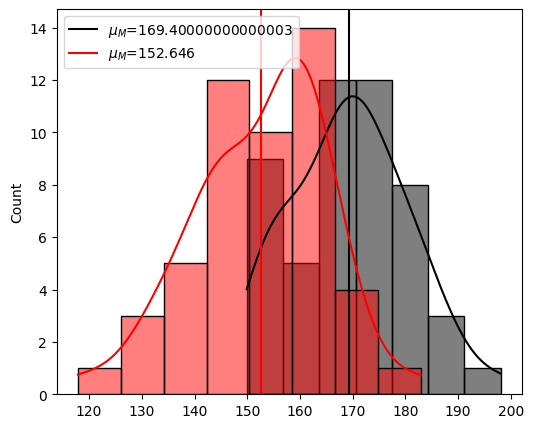

In [ ]:
fig=plt.figure(figsize=(6,5))
sns.histplot(Y,kde=True,color='black')
plt.axvline(media_hombre,color='black',label=f'$\mu_M$={media_hombre}')
sns.histplot(X,kde=True,color='red')
plt.axvline(media_mujer,color='red',label=f'$\mu_M$={media_mujer}')
plt.legend()
plt.show()

Observación:  

Se pretende comparar dos muestras independientes  ( que provienen de distintas poblaciones)

# Prueba de Hipótesis para diferencia de medias

Consideremos una muestra $X_1, . . . ,X_n$ de una variable
$$X \sim Norm(\mu_X, \sigma^2_X)$$

y otra muestra $Y_1, . . . , Y_m$ de
$$
Y \sim Norm(\mu_Y,\sigma_Y^2)
$$

Nos interesa estudiar si $\mu_X$ y $\mu_Y$ son iguales o no. Para esto podemos contrastar si sus medias son
iguales o bien si alguna de ellas es mayor que la otra.
Vamos a considerar el contraste de igualdad de medias frente a la desigualdad lo que también se llama
contraste bilateral, bidireccional o de dos colas:

$$
H_0 : \mu_X=\mu_Y\qquad H_1: \mu_X\neq \mu_Y
$$

La región crítica, es decir, los valores para los cuales rechazamos $H_0$ es:

$$
|T_0|\geq t_{1-\alpha/2,n_Y+n_X-2}
$$

con
$$
T_0=\frac{\bar{X}-\bar{Y}}{s_p\sqrt{\dfrac{1}{n_Y}+\dfrac{1}{n_X}}}
$$
en el caso de que las varianzas poblaciones sean iguales

y
$$
T_0=\frac{\bar{X}-\bar{Y}}{\sqrt{\dfrac{S_x^2}{n_X}+\dfrac{S_y^2}{n_Y}}}
$$
en el caso de que las varianzas poblacionales sean distintas.

**Observación**: El pvalor viene dado por
$$
p_{val} = P(T_0 ≥ |t_0|)
$$
siendo $t_0$ el valor observado de $T_0$ en cada caso.

**Ejemplo**

Determinaremos si la estatura promedio entre el grupo de los hombres, es la misma que la estatura promedio de las mujeres.

Consideraremos que ambas muestras provienen de poblaciones con varianzas distintas.

**Solución**

En este caso, tenemos la siguiente prueba de hipótesis
$$
H_0: \mu_X=\mu_Y\qquad H_1: \mu_X\neq \mu_Y
$$

**Sol**:

Calcular el estadístico de prueba

$$
T_0=\frac{\bar{X}-\bar{Y}}{\sqrt{\dfrac{S_x^2}{n_X}+\dfrac{S_y^2}{n_Y}}}
$$

In [ ]:
# Parámetros muestrales
media_mujer,var_mujer,n_mujer=X.mean(),X.var(),len(X) # extraer parámetros muestrales para el grupo de las mujeres
media_hombre,var_hombre,n_hombre=Y.mean(),Y.var(),len(Y) # extraer parámetros muestrales para el grupo de los hombres

In [ ]:
import math

In [ ]:
# Estadístico de prueba
estadistico_prueba=(media_mujer-media_hombre)/math.sqrt(var_mujer/n_mujer+var_hombre/n_hombre)
print(f' El estadístico de prueba es T_0:{round(estadistico_prueba,3)}')

 El estadístico de prueba es T_0:-7.173


La región crítica, es decir, los valores para los cuales rechazamos $H_0$ es:

$$
T_0 \in [-t_{1-\alpha/2,n_Y+n_X-2},t_{1-\alpha/2,n_Y+n_X-2}]
$$

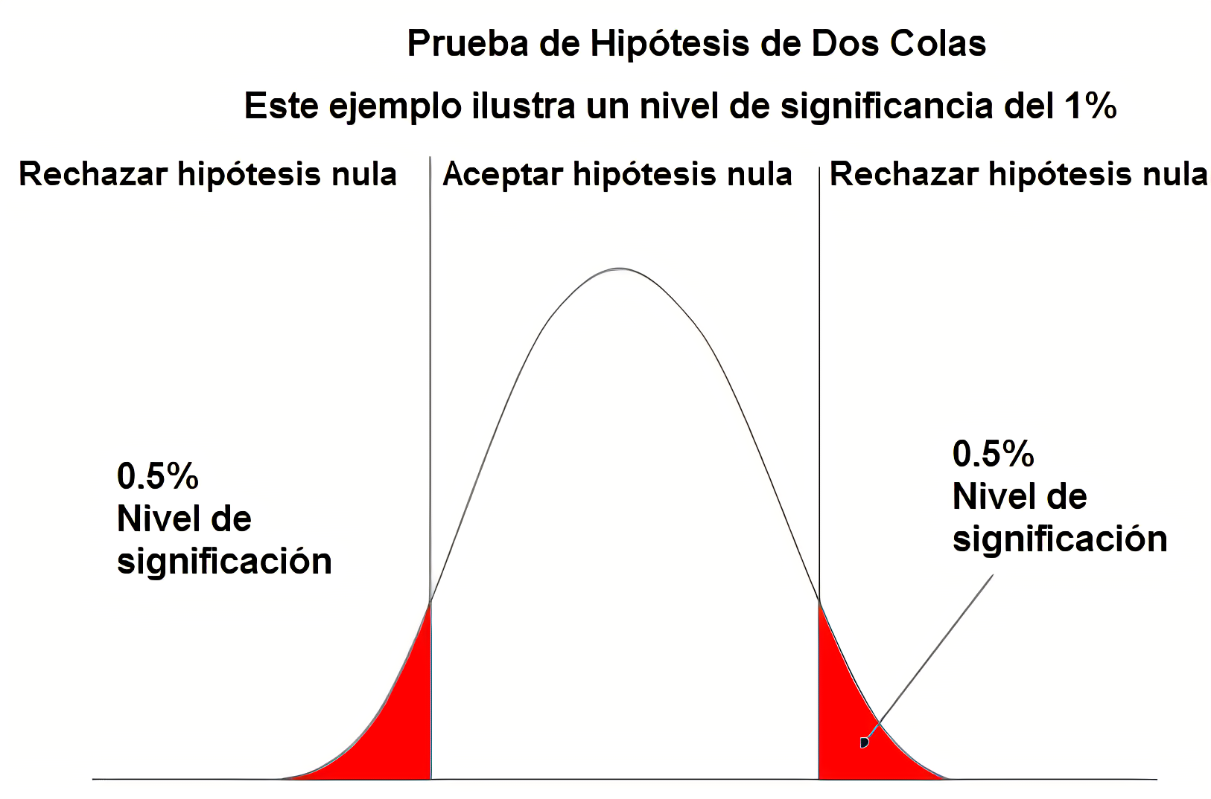

In [ ]:
significancia=0.05

In [ ]:
puntuacion_t=ss.t.ppf(1-significancia/2,n_mujer+n_hombre-2)

In [ ]:
# Prueba de hipótesis
if (-puntuacion_t<=estadistico_prueba) & (estadistico_prueba>=puntuacion_t): # estadístico de prueba pertenece a la zona de aceptacion
  print('Aceptamos H_0: No existe diferencia significativa entre las alturas medias reales de ambos grupos')
else:
  print('Aceptamos H_1:existe diferencia significativa entre las alturas medias reales de ambos grupos')

Aceptamos H_1:existe diferencia significativa entre las alturas medias reales de ambos grupos


**Forma b**


**Solución**

En este caso, tenemos la siguiente prueba de hipótesis
$$
H_0: \mu_X=\mu_Y\qquad H_1: \mu_X\neq \mu_Y
$$

In [ ]:
ss.ttest_ind(X,Y,alternative='two-sided',equal_var=False)
# estadistico de prueba: -7.1
# p_valor=p_value

TtestResult(statistic=np.float64(-7.100556555240187), pvalue=np.float64(2.1144805335993093e-10), df=np.float64(96.47766653140962))

## Prueba de hipótesis para diferencia de medias: Prueba unilateral

Para una prueba de cola unilateral, consideraremos
$$
H_0: \mu_X\leq \mu_Y\qquad H_1: \mu_X>\mu_Y
$$

**Ejemplo**


Se desea verificar si el nuevo método de capacitación (Grupo B) genera un mejor rendimiento promedio que el método tradicional (Grupo A), mediante una prueba  para la diferencia de medias. Los datos, se disponen a continuación:

(Considere que ambas muestras fueron seleccionadas de grupos con varianzas diferentes)

**Datos obtenidos por el método de capacitación A**

In [ ]:
A= np.array([4.9, 5.4, 5.2, 2.8, 3.9, 5.6, 5.5, 4.4, 5.4, 5.7, 6.2, 6.5, 4.9,
       5.3, 5.6, 4.2, 5.3, 5.1, 5. , 4.8, 4.4, 4.8, 3.4, 5.1, 5.9, 4.6,
       5.7, 5.4, 4.5, 6.7, 4.2, 3.7, 4.1, 7.5, 6.8, 5.3, 6.9, 6.4, 4.5,
       4.3, 4.9, 7. , 5.9, 5.2, 5.2, 6.6, 4.6, 5.3, 4.9, 5. ])

**Datos obtenidos por el método de capacitación B**

In [ ]:
B=np.array([5.9, 4.8, 5.7, 4.3, 4.7, 5.8, 5.7, 6.1, 5.2, 6. , 5. , 6. , 5.5,
       4.6, 4.2, 5.6, 7., 5.2, 6.9, 5. , 4.5, 4.2, 5.7, 6.5, 5.3, 6.8,
       4.9, 4.5, 5.6, 3.9, 4.8, 6.2, 5.1, 5. , 6.4, 3.8, 5. , 5.8, 4.8,
       5.1, 6.4, 7., 6.7, 5.5, 7.2, 5.5, 3.7, 6.6, 6.3, 5.9])

Sol:
En este caso, se desea hacer la prueba de hipótesis considerando los siguientes supuestos
$$
H_0: \mu_B\geq \mu_A\qquad H_1:\mu_B<\mu_A
$$


Como las varianzas poblacionales de ambos grupos son distintas
$$
T_0=\frac{\bar{X}-\bar{Y}}{\sqrt{\dfrac{S_x^2}{n_X}+\dfrac{S_y^2}{n_Y}}}
$$

In [ ]:
# Prueba T
stat,p_value=ss.ttest_ind(A,B,alternative='greater',equal_var=False)
# H_1: media_A> media_B

In [ ]:
if p_value>=significancia:
  print('Se acepta H_0: El resultado medio del grupo B, es superior al del grupo A')
else:
  print(' Se acepta H_1')

Se acepta H_0: El resultado medio del grupo B, es superior al del grupo A


**Actividad**

A partir de la base de datos diamonds, extraer una muestra aleatoria de 1500 diamantes con corte "Ideal" y otra muestra aleatoria de 1500 diamantes con corte "Premium".

Determina, mediante una prueba de hipótesis, si existe evidencia estadística de una diferencia significativa en el precio promedio entre ambos tipos de corte.

Sol:

Sea $\mu_X$ el precio promedio de los diamantes de corte **Ideal**
y $\mu_Y$ el precio promedio de los diamantes de corte **Premium**

$$
H_0: \mu_X=\mu_Y\qquad H_1: \mu_X\neq \mu_Y
$$

In [ ]:
diamantes=sns.load_dataset('diamonds')

In [ ]:
precio_ideal=diamantes[diamantes['cut']=='Ideal']['price'] # Precio de los diamantes de corte ideal
precio_premium=diamantes[diamantes['cut']=='Premium']['price']

In [ ]:
import random

In [ ]:
# extraer muestras
muestra_ideal=np.random.choice(precio_ideal,size=1500)
muestra_premium=np.random.choice(precio_premium,size=1500)

In [ ]:
# PRueba de hipótesis
stat_1,p_value1=ss.ttest_ind(muestra_ideal,muestra_premium,alternative='two-sided',equal_var=False)

In [ ]:
if p_value1>=significancia:
  print('Se acepta H_0: El precio promedio real de ambos tipos de diamantes es igual')
else:
  print(' Se acepta H_1: El precio promedio real de ambos tipos de diamantes es distinto')

 Se acepta H_1: El precio promedio real de ambos tipos de diamantes es distinto


# Pruebas de hipótesis para diferencia de varianzas

Hasta ahora no nos hemos preocupado de las varianzas de las poblaciones normales con las que estamos
trabajando. Ya es hora de hacerlo. Además es enormemente importante estimar y contrastar cosas
sobre las varianzas. Tenemos dos muestras correspondientes a dos poblaciones.
y consideraremos
$$
H_0:\sigma_X^2=\sigma_Y^2\qquad H_1:\sigma_Y^2\neq \sigma_X^2
$$

**Prueba de dos colas**

## 1. Prueba de Fisher

La prueba de Fisher, se utiliza para para determinar si dos muestras, provienen de grupos con igual varianza.
Para utilizar la prueba de Fisher, es necesario que los datos provengan de poblaciones normales, además que las observaciones deben ser independientes.


Así $H_0: \sigma_X^2=\sigma_Y^2$, se sigue que el estadístico
$$
F=\frac{S_X^2}{S_Y^2}\sim F(n_X-1,n_Y-1)
$$

**Observación**: Se coloca la mayor varianza en el numerador para evitar un $F < 1$

**Observación 2:**

Para una prueba de dos colas, se acepta $H_0$ si y s\'olo si
$$
F_{1-\alpha/2,n_x-1,n_y-1}< F < F_{\alpha/2,n_x-1,n_y-1}
$$


**Ejemplo**


Se desea verificar si el nuevo método de capacitación (Grupo B) genera un mejor rendimiento promedio que el método tradicional (Grupo A), mediante una prueba  para la diferencia de medias. Los datos, se disponen a continuación:

In [ ]:
print(f'Resultados con la metodología tradicional de enseñanza{A}')
print(f'Resultados con la metodología tradicional de enseñanza{B}')

Resultados con la metodología tradicional de enseñanza[4.9 5.4 5.2 2.8 3.9 5.6 5.5 4.4 5.4 5.7 6.2 6.5 4.9 5.3 5.6 4.2 5.3 5.1
 5.  4.8 4.4 4.8 3.4 5.1 5.9 4.6 5.7 5.4 4.5 6.7 4.2 3.7 4.1 7.5 6.8 5.3
 6.9 6.4 4.5 4.3 4.9 7.  5.9 5.2 5.2 6.6 4.6 5.3 4.9 5. ]
Resultados con la metodología tradicional de enseñanza[5.9 4.8 5.7 4.3 4.7 5.8 5.7 6.1 5.2 6.  5.  6.  5.5 4.6 4.2 5.6 7.  5.2
 6.9 5.  4.5 4.2 5.7 6.5 5.3 6.8 4.9 4.5 5.6 3.9 4.8 6.2 5.1 5.  6.4 3.8
 5.  5.8 4.8 5.1 6.4 7.  6.7 5.5 7.2 5.5 3.7 6.6 6.3 5.9]


2. Probar que ambas muestras provienen de poblaciones con varianzas distintas
$$
H_0:\sigma^2_A=\sigma^2_B\qquad H_1:\sigma^2_A\neq\sigma^2_B
$$

In [ ]:
#normalidad de datos
ss.shapiro(A) # Los resultados obtenidos por el método de enseñanza clásico, provienen de una distribución norma
ss.shapiro(B) # Los resultados obtenidos por el nuevo método de enseñanza, provienen de una distribución normal

ShapiroResult(statistic=np.float64(0.9821704840572912), pvalue=np.float64(0.6463983906632147))

In [ ]:
# Prueba de Fisher: Calcular parámetros muestrales
var_A,n_A=A.var(),len(A)
var_B,n_B=B.var(),len(B)

In [ ]:
alpha=significancia

In [ ]:
if var_A>=var_B: # La varianza de la muestra A, es superior a la varianza de la muestra B
  F_0=var_A/var_B
  l_inf,l_sup=ss.f.ppf(1-alpha/2,n_A-1,n_B-1),ss.f.ppf(alpha/2,n_A-1,n_B-1)
  print(f'F_0:{F_0}')
  if (F_0>=l_inf) & (F_0<=l_sup):
   print('Aceptamos H_0: las varianzas poblacionales son iguales')
  else:
    print('Rechazamos H_0: Las varianzas poblacionales son distintas')
else: # La varianza de la muestra B, sea superior a la varianza de la muestra A
  F_0=var_B/var_A # Definimos estadístico de prueba
  l_inf,l_sup=ss.f.ppf(1-alpha/2,n_B-1,n_A-1),ss.f.ppf(alpha/2,n_B-1,n_A-1) # limite inferior y limite superor
  print(f'F_0:{F_0}')
  if (F_0>=l_inf) & (F_0<=l_sup): # Realizamos la prueba de hipótesis
    print('Aceptamos H_0: las varianzas poblacionales son iguales')
  else:
    print('Rechazamos H_0: Las varianzas poblacionales son distintas')

F_0:1.1487853477314771
Rechazamos H_0: Las varianzas poblacionales son distintas


**Ejemplo:**

Considerando la base de datos **mpg** de la librería seaborn, determinar si la dispersión de las aceleraciones (variable acceleration) de los automóviles de Usa y Japón, son similares o no.

Sol:


$$
H_0: \sigma^2_j=\sigma^2_u\qquad H_1:\sigma^2_j\neq\sigma^2_u
$$
con
- $\sigma^2_u$: varianza de la aceleración de los autos de usa
- $\sigma^2_j$: varianza de la aceleración de los autos de japon


**Sol:**
Considerar que ambas muestras provienen de poblaciones que se distribuyen normal

In [ ]:
# la variable aceleraccion, se distribuye normal
autos=sns.load_dataset('mpg')

In [ ]:
# Extreamos las observaciones
japon=autos[autos['origin']=='japan']['acceleration']
usa=autos[autos['origin']=='usa']['acceleration']

In [ ]:
# Extraer parámetros muestrales
varianza_j,n_j=japon.var(),len(japon)
varianza_u,n_u=usa.var(),len(usa)

$$
F_{1-\alpha/2,n_x-1,n_y-1}< F < F_{\alpha/2,n_x-1,n_y-1}
$$

In [ ]:
if varianza_u>=varianza_j:
  F_0=varianza_u/varianza_j
  print(f'F_0:{F_0} var_usa>var_japon')
  l_inferior,l_superior=ss.f.ppf(1-significancia/2,n_u-1,n_j-1),ss.f.ppf(significancia/2,n_u-1,n_j-1)
  if (F_0>=l_inferior) &(F_0<=l_superior):
    print('Se acepta H_0: Hay igualdad de varianzas')
  else:
    print('Se rechaza H_0: La dispersión poblacional de las aceleraciones es distinta ')
else:
  F_0=varianza_j/varianza_u
  print(f'F_0:{F_0} var_japon> var_usa')
  l_inferior1,l_superior1=ss.f.ppf(1-significancia/2,n_j-1,n_u-1),ss.f.ppf(significancia/2,n_j-1,n_u-1)
  if (F_0>=l_inferior1) &(F_0<=l_superior1):
    print('Se acepta H_0: Hay igualdad de varianzas')
  else:
    print('Se rechaza H_0: La dispersión poblacional de las aceleraciones es distinta')

F_0:1.9803908430785466 var_usa>var_japon
Se rechaza H_0: La dispersión poblacional de las aceleraciones es distinta 


2. Determinar el $p_{valor}$

$$
p_{valor}=2\cdot(1-P(X\leq F_0))
$$
ya que estamos frente a una prueba de dos colas

$F_0:$  Estadístico de Fisher

In [ ]:
2*(1-ss.f.cdf(1.98,n_u-1,n_j-1))

np.float64(0.0005531126469859871)

## 2. Prueba de Levene

La prueba de Levene se utiliza para comprobar si las muestras de varios grupos, tienen la misma varianza de población.

### Supuestos:

La prueba de Levene, tiene basicamente dos condiciones:

1. Las observaciones son independientes
2. Las observaciones de cada muestra, no necesariamente provienen de una distribución normal

$$
H_0:\sigma^2_X=\sigma^2_Y\qquad H_1: \sigma^2_X\neq\sigma^2_Y
$$

**Ejercicio**


Un administrador de un restaurante desea investigar si existe una diferencia significativa en el monto facturado total, que dejan los clientes fumadores y los no fumadores. Para ello, se utilizará una muestra extraída de la base de datos tips, que contiene información sobre cada cuenta, propina, sexo del personal que atendió, día, hora, etc.

Se pide:

1. Realizar una prueba de igualdad de varianzas entre las montos facturados totales, de los fumadores y de los no fumadores

**Utilizaremos la prueba de Levene para determinar si hay igualdad de varianzas**

$$
H_0:\sigma^2_F=\sigma^2_N\qquad H_1: \sigma^2_F\neq\sigma^2_N
$$
con
- $\sigma^2_F$ varianza de las propinas que dejan los fumadores


- $\sigma^2_N$ varianza de las propinas que dejan los no smoker

In [ ]:
tip=sns.load_dataset('tips')

In [ ]:
# muestras
fumadores=tip[tip['smoker']=='Yes']['total_bill']
no_fumadores=tip[tip['smoker']=='No']['total_bill']

In [ ]:
stat_levene,p_levene=ss.levene(fumadores,no_fumadores)

In [ ]:
if p_levene>=significancia:
  print('La dispersión de los totales facturados es la misma')
else:
  print('La dispersión de los totales facturados no es la misma')

La dispersión de los totales facturados no es la misma


2. ¿Es correcto afirmar que no existe diferencia significativa, entre los montos totales facturados de ambos grupos?

Sol:
$$
H_0:\mu_F=\mu_N\qquad H_1:\mu_F\neq \mu_F
$$

In [ ]:
ss.ttest_ind(fumadores,no_fumadores,alternative='two-sided',equal_var=False)
# Aceptamos H_0: no existe evidencia significativa para afirmar que los montos facturados son distintos

TtestResult(statistic=np.float64(1.2842515757360153), pvalue=np.float64(0.20080519917308062), df=np.float64(169.625891615264))